In [1]:
import sys
import torch
import math
import numpy as np
import pandas as pd
import torch.nn as nn

sys.path.insert(0,'../')

from gtm import GTMEstimator

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_wine, load_boston, make_blobs, make_classification

from IPython.display import clear_output

In [2]:
data = load_wine()
X = torch.FloatTensor(data.data)
N,out_features =X.size()

est = GTMEstimator(out_features=out_features, in_features=2, hidden_features=64, map_points=10, verbose=False,
                 batch_size=10,
                 lmbd=0, cuda=False)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

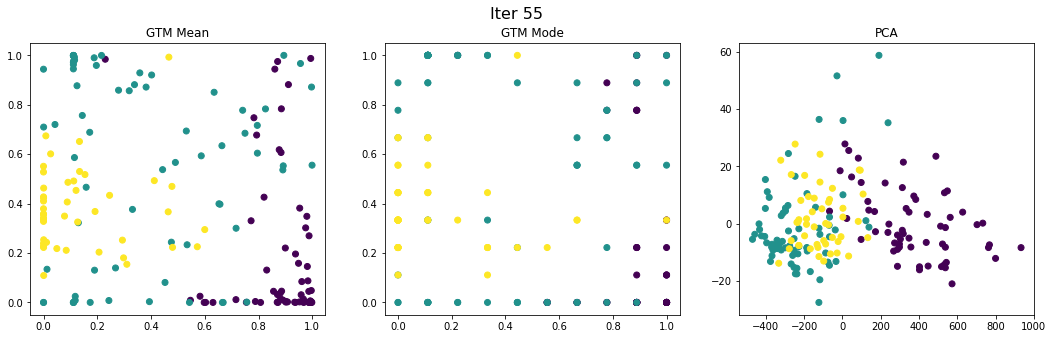

tensor(121.9245)


In [ ]:
for i in range(300):
    for _ in range(10):
        res = est.train_epoch(X)
    
    output_mean = (est.transform(X,"mean")).numpy()    
    
    output_mode = (est.transform(X,"node")).numpy() 
    clear_output(wait=True)
    plt.figure(figsize=(18, 5))
    plt.suptitle(f'Iter {i}', fontsize=16)
    
    ax_mean = plt.subplot(131)
    ax_mean.scatter(*output_mean.T, c=data.target)
    ax_mean.set_title("GTM Mean")
    
    ax_mode = plt.subplot(132)
    ax_mode.scatter(*output_mode.T, c=data.target)
    ax_mode.set_title("GTM Mode")
    
    ax_pca = plt.subplot(133)
    ax_pca.scatter(*X_pca.T, c=data.target)
    ax_pca.set_title("PCA")
    
    plt.show()
    print(min(res))

In [4]:
est.transform(X)

tensor([[0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0

In [4]:
est.inverse_transform(torch.tensor([[0.5,0.5]]))

tensor([[1.6607, 0.3271, 0.7315, 0.0461]], grad_fn=<MulBackward0>)

In [5]:
X


tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0